# Capilano University
## Computing and Data Science
### Interview questions

### Question 1: 
This code is from a 1st year student’s lab submission in COMP115: Computational Thinking; 
It computes some basic metrics on a DNA sequence encoded as an arbitrary string of base letters, "GCAT"
The student asks if there is anything they can do to improve the code.  
How would you advise them?

In [10]:
# valid sequences are made from triplets of bases
def is_valid_seq(seq):
    for letter in seq:
        if letter == 'G':
            pass
        elif letter == 'C':
            pass
        elif letter == 'A':
            pass
        elif letter == 'T':
            pass
        else:
            return False
    length = 0
    for letter in seq:
        length = length + 1
        if length == 3:
            length = 0
    if length == 0:
        return True
    else:
        return False

assert is_valid_seq('GCTACGGAGCTT') == True
assert is_valid_seq('GCTACGGAGCT') == False  # not div. by 3
assert is_valid_seq('CATHATRATTAP') == False  # not all bases


# each codon is a triplet of base letters
def extract_codons(seq): 
    assert is_valid_seq(seq)
    l = []
    i = 0
    while i < len(seq):
        l1 = seq[i]
        i = i+1
        l2 = seq[i]
        i = i+1
        l3 = seq[i]
        i = i+1
        l.append(l1 + l2 + l3)

    return l

assert extract_codons('ATG') == ['ATG',]
assert extract_codons('AAACCCGGGTTT') == ['AAA', 'CCC', 'GGG', 'TTT']
assert extract_codons('GCTACGGAGCTT') == ['GCT', 'ACG', 'GAG', 'CTT']
print("All tests passed!")

All tests passed!


### Question 2: 
Consider an undirected graph with $n$ nodes connected with probability $p$:

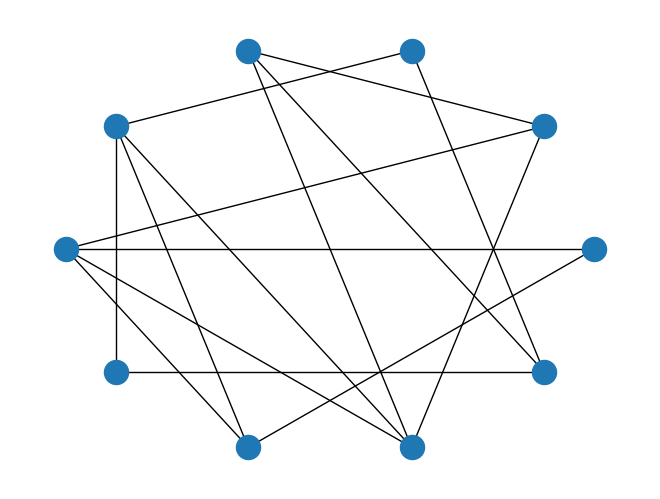

In [11]:
import random
import networkx as nx

def random_pairs(objects, p):
    """Return a random subset of distinct object pairs (2-tuples), each with a probability `p`"""
    all_pairs = ((a, b) for i in range(1, len(objects)) for a,b in zip(objects, objects[i:]))
    return (pair for pair in all_pairs if random.random() < p)

def make_random_graph(n, p):
    """Return an ER Graph with n nodes, with probability p of an edge between any pair of nodes"""
    graph = nx.Graph()
    labels = range(n)
    graph.add_nodes_from(labels)
    graph.add_edges_from(random_pairs(labels, p))
    return graph

random_graph = make_random_graph(n=10, p=0.3)

nx.draw_circular(random_graph)

The following algorithm is covered in our 2nd year Computational Science course.
It determines if an undirected graph is connected.  
What are some of the concepts that would be important to discuss with students about this algorithm?

In [12]:
def reachable_nodes(graph, start):
    """ return the set of nodes that are reachable from the given start node"""
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(graph.neighbors(node))
    return seen


def is_connected(graph):
    """ Return True if the graph is connected, false otherwise. """
    start = next(iter(graph))
    reachable = reachable_nodes(graph, start)
    return len(reachable) == len(graph)

'Connected' if is_connected(random_graph) else 'Not Connected'

'Connected'